In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.figsize'] = (14, 5)

In [2]:
# load data
# cartesian
x_actual = np.genfromtxt('x_actual_accel_cor.csv', delimiter = ',')
x_actual = x_actual[1:,:]
num_snaps = x_actual.shape[0]
# time
t = np.genfromtxt('time_accel_cor.csv', delimiter = ',')
t = t[1:num_snaps+1,:]


In [3]:
# get sensor data and apply the mocap accuracy
x_measured = np.round(x_actual[:,1:4],4)
x_measured.shape

(8140, 3)

In [16]:
##
# get position and velocity
def differentiator(ra, ra_dot_prev,dt):
    ## euler
    length = ra.shape[0]
    if length < 10:
        ra_dot = (ra[-1,:]-ra[-2,:])/dt
        ra_ddot = (ra_dot - ra_dot_prev[-2,:])/dt

    # else:
    #     ra_dot = (ra[-1,:]-ra[-3,:])/(2*dt)
    #     ra_ddot = (ra_dot - ra_dot_prev[-3,:])/(2*dt)
    
    # good vel, accel- a bit bad
    # else:
    #     ra_dot = (ra[-1,:] + ra[-2,:]-ra[-3,:]-ra[-4,:])/(4*dt)
    #     ra_ddot = (ra_dot  + ra_dot_prev[-2,:]-ra_dot_prev[-3,:]-ra_dot_prev[-4,:])/(4*dt)
    
    # very good
    # else:
    #     ra_dot = (ra[-1,:] + 2*ra[-2,:] - 2*ra[-4,:] - ra[-5,:])/(8*dt)
    #     ra_ddot = (ra_dot  + 2*ra_dot_prev[-2,:] - 2*ra_dot_prev[-4,:]-ra_dot_prev[-5,:])/(8*dt)
    
    # better
    # else:
    #     ra_dot = (ra[-1,:] + 3*ra[-2,:] + 2*ra[-3,:]  - 2*ra[-4,:] - 3*ra[-5,:] - ra[-6,:])/(16*dt)
    #     ra_ddot = (ra_dot + 3*ra_dot_prev[-2,:] + 2*ra_dot_prev[-3,:]  - 2*ra_dot_prev[-4,:] - 3*ra_dot_prev[-5,:] - ra_dot_prev[-6,:])/(16*dt)
    
    # velocity starts to get worse, but acceleration is good
    else:
        ra_dot = (ra[-1,:] + 4*ra[-2,:] + 5*ra[-3,:]  - 5*ra[-5,:] - 4*ra[-6,:] - ra[-7,:])/(32*dt)
        ra_ddot = (ra_dot + 4*ra_dot_prev[-2,:] + 5*ra_dot_prev[-3,:]  - 5*ra_dot_prev[-5,:] - 4*ra_dot_prev[-6,:] - ra_dot_prev[-7,:])/(32*dt)
       
     # else:
#          ra_dot = (ra[-1,:] + 5*ra[-2,:] + 9*ra[-3,:]  + 5*ra[-4,:] - 5*ra[-5,:] - ra[-6,:])/(64*dt)
#         ra_ddot = (ra_dot + 5*ra_dot_prev[-2,:] + 9*ra_dot_prev[-3,:]  + 5*ra_dot_prev[-4,:] - 5*ra_dot_prev[-5,:] - ra_dot_prev[-6,:])/(64*dt)
       
        
#     else:
#         ra_dot = (ra[-1,:] + 2*ra[-2,:] - 2*ra[-3,:] - ra[-4,:])/(8*dt)
#         ra_ddot = (ra_dot  + 2*ra_dot_prev[-2,:] - 2*ra_dot_prev[-3,:]-ra_dot_prev[-4,:])/(8*dt)
        
    # preisce on 1,x
    
    # window = 6
    # else:
    #     ra_dot = (ra[-1,:] + 4*ra[-2,:] + 5*ra[-3,:] - 5*ra[-4,:] - 4*ra[-5,:] - ra[-6,:])/(32*dt)
    #     ra_ddot = (ra_dot + 4*ra_dot_prev[-2,:] + 5*ra_dot_prev[-3,:] - 5*ra_dot_prev[-4,:] - 4*ra_dot_prev[-5,:] - ra_dot_prev[-6,:])/(32*dt)

    return ra_dot, ra_ddot

In [30]:
xdot_measured = np.zeros_like(x_measured)
xddot_measured = np.zeros_like(x_measured)

for i in range(x_measured.shape[0]-1):
    xdot_measured[i+1,:],xddot_measured[i+1,:] = differentiator(x_measured[:i+2,:],xdot_measured[:i+2,:],t[i+1,1])
    
    window = 2
    if i > window:
        xdot_measured[i+1,:] = np.mean(xdot_measured[i-window:i+2,:],axis = 0)
        xdot_measured[i+1,:] = np.mean(xdot_measured[i-window:i+2,:],axis = 0)
        
        xddot_measured[i+1,:] = np.mean(xddot_measured[i-window:i+2,:],axis = 0)
        xddot_measured[i+1,:] = np.mean(xddot_measured[i-window:i+2,:],axis = 0)
    else:
        xdot_measured[i+1,:] = np.mean(xdot_measured[:i+2,:],axis = 0)
        xddot_measured[i+1,:] = np.mean(xdot_measured[:i+2,:],axis = 0)

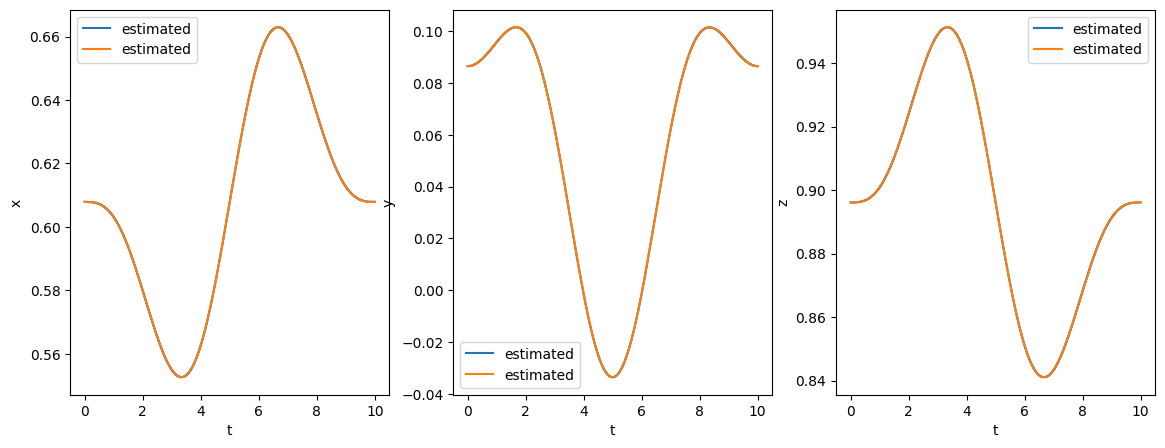

Text(0, 0.5, 'e_z')

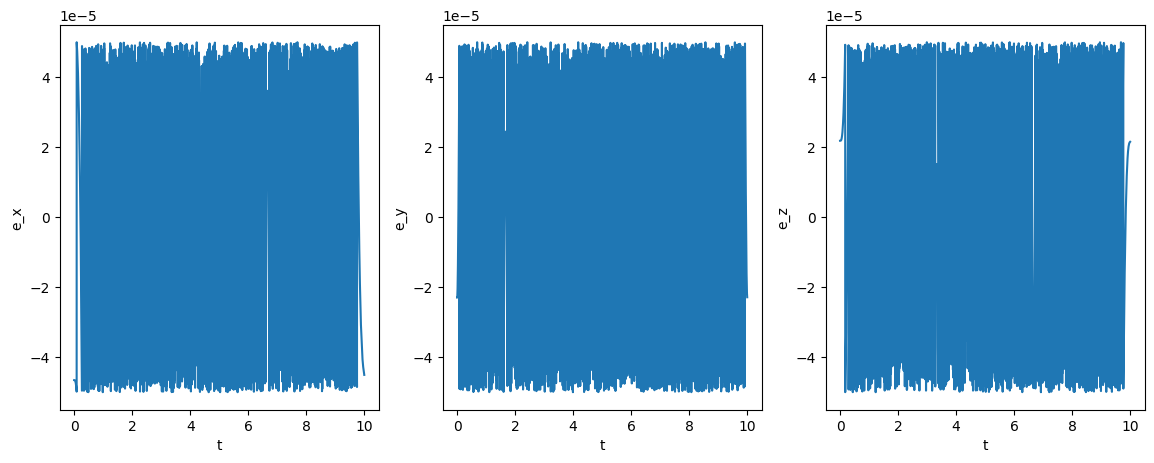

In [31]:
plt.subplot(1,3,1)
plt.plot(t[:,2],x_measured[:,0], label = 'estimated')
plt.plot(t[:,2],x_actual[:,1], label = 'estimated')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.subplot(1,3,2)
plt.plot(t[:,2],x_measured[:,1], label = 'estimated')
plt.plot(t[:,2],x_actual[:,2], label = 'estimated')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.plot(t[:,2],x_measured[:,2], label = 'estimated')
plt.plot(t[:,2],x_actual[:,3], label = 'estimated')
plt.xlabel('t')
plt.ylabel('z')
plt.legend()
plt.show()

plt.subplot(1,3,1)
plt.plot(t[:,2],x_actual[:,1] - x_measured[:,0])
plt.xlabel('t')
plt.ylabel('e_x')

plt.subplot(1,3,2)
plt.plot(t[:,2],x_actual[:,2] - x_measured[:,1])
plt.xlabel('t')
plt.ylabel('e_y')

plt.subplot(1,3,3)
plt.plot(t[:,2],x_actual[:,3] - x_measured[:,2])
plt.xlabel('t')
plt.ylabel('e_z')

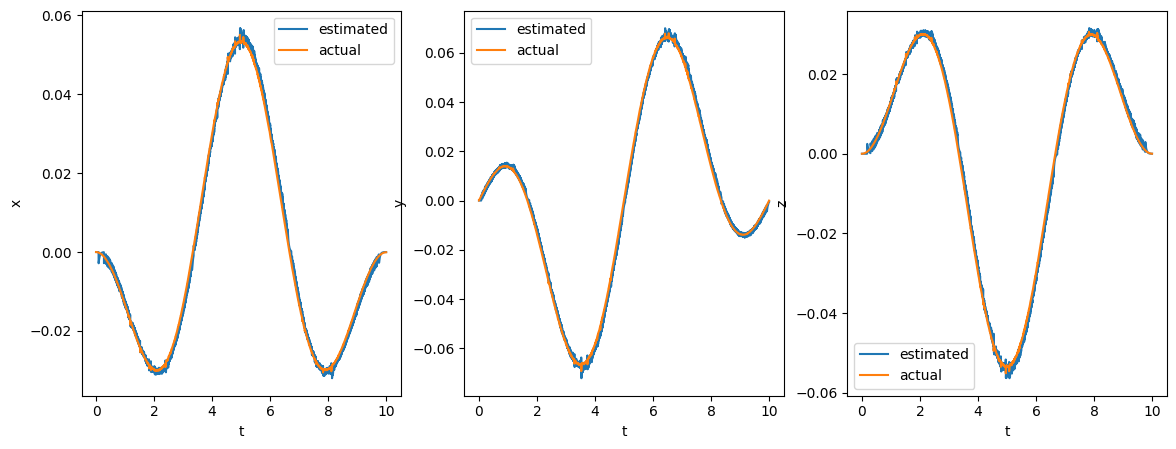

Text(0, 0.5, 'e_zdot')

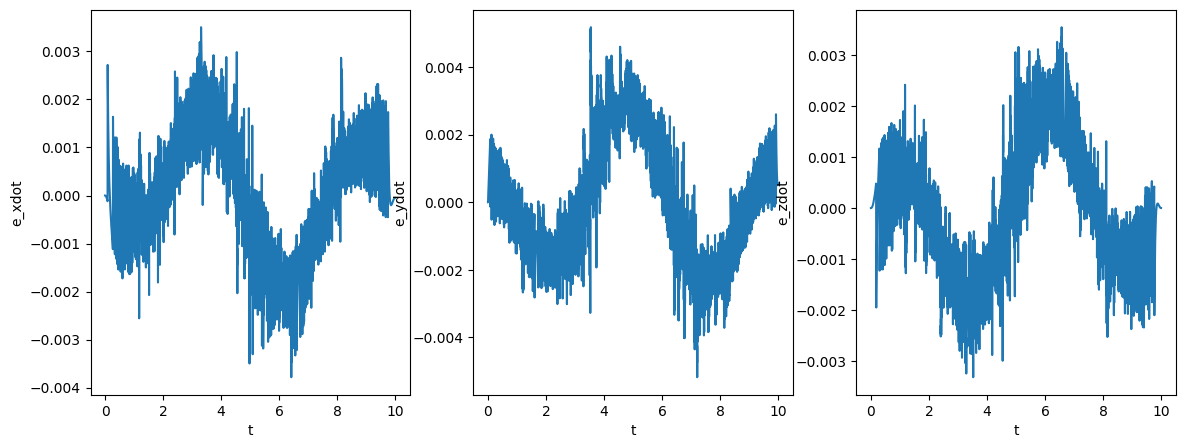

In [32]:
plt.subplot(1,3,1)
plt.plot(t[:,2],xdot_measured[:,0], label = 'estimated')
plt.plot(t[:,2],x_actual[:,4], label = 'actual')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.subplot(1,3,2)
plt.plot(t[:,2],xdot_measured[:,1], label = 'estimated')
plt.plot(t[:,2],x_actual[:,5], label = 'actual')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.plot(t[:,2],xdot_measured[:,2], label = 'estimated')
plt.plot(t[:,2],x_actual[:,6], label = 'actual')
plt.xlabel('t')
plt.ylabel('z')
plt.legend()
plt.show()

plt.subplot(1,3,1)
plt.plot(t[:,2],x_actual[:,4] - xdot_measured[:,0])
plt.xlabel('t')
plt.ylabel('e_xdot')


plt.subplot(1,3,2)
plt.plot(t[:,2],x_actual[:,5] - xdot_measured[:,1])
plt.xlabel('t')
plt.ylabel('e_ydot')


plt.subplot(1,3,3)
plt.plot(t[:,2],x_actual[:,6] - xdot_measured[:,2])
plt.xlabel('t')
plt.ylabel('e_zdot')


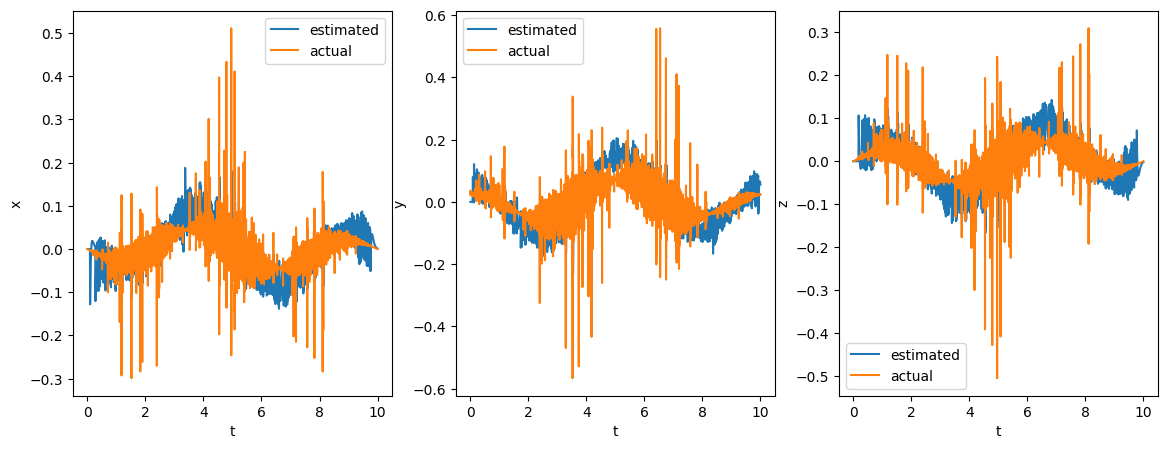

Text(0, 0.5, 'e_zddot')

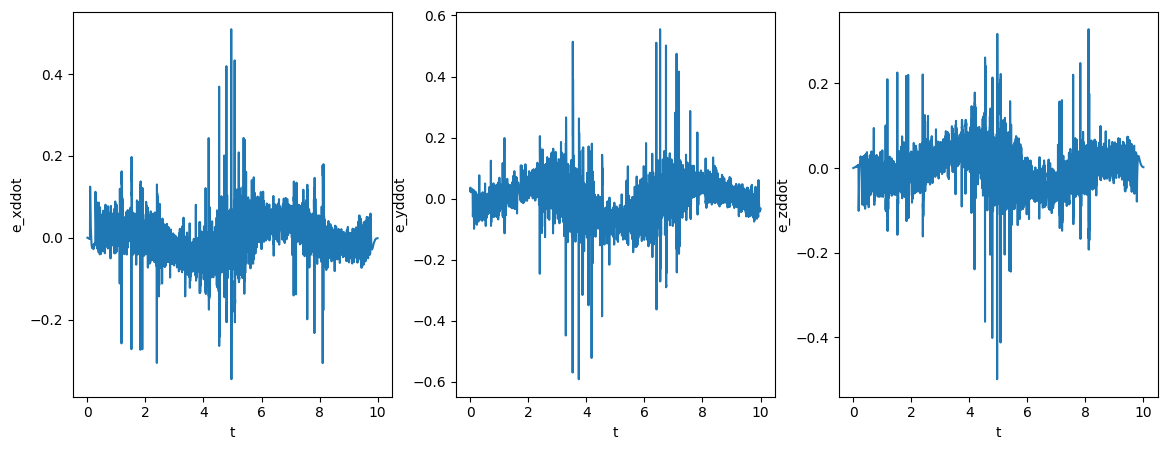

In [33]:
plt.subplot(1,3,1)
plt.plot(t[:,2],xddot_measured[:,0], label = 'estimated')
plt.plot(t[:,2],x_actual[:,7], label = 'actual')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.subplot(1,3,2)
plt.plot(t[:,2],xddot_measured[:,1], label = 'estimated')
plt.plot(t[:,2],x_actual[:,8], label = 'actual')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.plot(t[:,2],xddot_measured[:,2], label = 'estimated')
plt.plot(t[:,2],x_actual[:,9], label = 'actual')
plt.xlabel('t')
plt.ylabel('z')
plt.legend()

plt.show()

plt.subplot(1,3,1)
plt.plot(t[:,2],x_actual[:,7] - xddot_measured[:,0])
plt.xlabel('t')
plt.ylabel('e_xddot')


plt.subplot(1,3,2)
plt.plot(t[:,2],x_actual[:,8] - xddot_measured[:,1])
plt.xlabel('t')
plt.ylabel('e_yddot')


plt.subplot(1,3,3)
plt.plot(t[:,2],x_actual[:,9] - xddot_measured[:,2])
plt.xlabel('t')
plt.ylabel('e_zddot')

In [25]:
# 